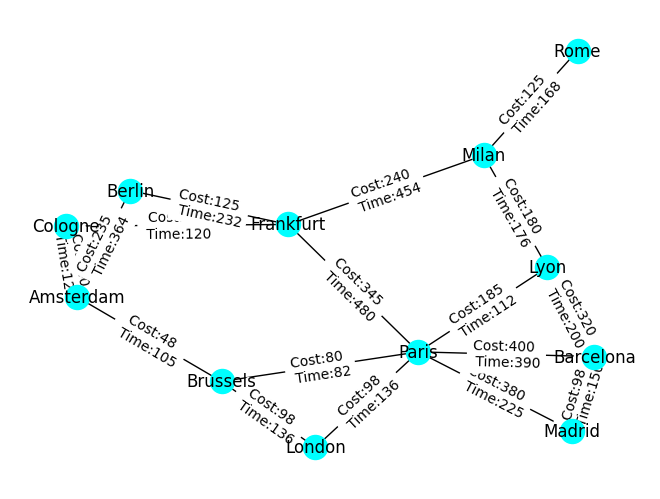

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import operator

graph = nx.Graph()
graph.add_nodes_from(["London", "Paris", "Madrid", "Barcelona", "Lyon", "Milan", "Rome", "Frankfurt", "Cologne", "Berlin", "Brussels", "Amsterdam"])
graph.add_edge("London", "Paris", time=136, cost=98)
graph.add_edge("London", "Brussels", time=136, cost=98)
graph.add_edge("Paris", "Madrid", time=225, cost=380)
graph.add_edge("Paris", "Barcelona", time=390, cost=400)
graph.add_edge("Paris", "Lyon", time=112, cost=185)
graph.add_edge("Paris", "Frankfurt", time=480, cost=345)
graph.add_edge("Paris", "Brussels", time=82, cost=80)
graph.add_edge("Madrid", "Barcelona", time=150, cost=98)
graph.add_edge("Barcelona", "Lyon", time=200, cost=320)
graph.add_edge("Lyon", "Milan", time=176, cost=180)
graph.add_edge("Milan", "Rome", time=168, cost=125)
graph.add_edge("Milan", "Frankfurt", time=454, cost=240)
graph.add_edge("Frankfurt", "Cologne", time=120, cost=40)
graph.add_edge("Frankfurt", "Berlin", time=232, cost=125)
graph.add_edge("Brussels", "Amsterdam", time=105, cost=48)
graph.add_edge("Amsterdam", "Berlin", time=364, cost=235)
graph.add_edge("Amsterdam", "Cologne", time=120, cost=40)

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='cyan')
edge_labels = {(u, v): f"Cost:{graph[u][v]['cost']} \n Time:{graph[u][v]['time']}" for u, v in graph.edges()}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')
plt.show()

In [37]:
#defining fitness functions
class Fitness:
    def __init__(self, route):
        self.route = route
        self.cost = 0
        self.time = 0
        self.fitness = 0.0

    def routeDistance(self):
      if self.cost == 0:
          path_cost = 0
          path_time = 0
          for i in range(0, len(self.route)):
              fromCity = self.route[i]
              if i + 1 < len(self.route):
                  toCity = self.route[i + 1]
              else:
                  toCity = self.route[0]
              if toCity.name in fromCity.neighbors:
                  path_cost += fromCity.distance(toCity)
                  path_time += fromCity.travel_time(toCity)
          self.cost = path_cost
          self.time = path_time
      return self.cost, self.time

    def routeFitness(self):
        if self.fitness == 0:
            cost, time = self.routeDistance()
            if time > 4320:
                self.fitness = 0
            else:
                self.fitness = 1 / float(cost)
        return self.fitness

In [38]:
class City:
    def __init__(self, name, neighbors):
        self.name = name
        self.neighbors = neighbors

    def distance(self, city):
        return self.neighbors[city.name]['cost']

    def travel_time(self, city):
        return self.neighbors[city.name]['time']

    def __repr__(self):
        return "(" + str(self.name) + ")"

In [39]:
def createRoute(cityList, G):
    route = []
    remaining_cities = cityList.copy()

    current_city = random.choice(remaining_cities)
    remaining_cities.remove(current_city)
    route.append(current_city)

    while remaining_cities:
      available_cities = [city for city in remaining_cities if city.name in current_city.neighbors]

      if not available_cities:
          return None

      next_city = random.choice(available_cities)
      route.append(next_city)
      remaining_cities.remove(next_city)
      current_city = next_city

    return route

def initialPopulation(popSize, cityList):
    population = []

    while len(population) < popSize:
        route = createRoute(cityList,graph)
        if route is not None:
            population.append(route)
    print(population)
    return population

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()

    sorted_results=sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_results
